In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [13]:
filename = 'n10000s4.csv'
title = ' sigma=4'

In [14]:
def summary(df, format='df'):
    stats = {}
    for cname in df.columns:
        values = df.loc[:,cname].values
        try:
            _means = np.mean(values)
            _vars = np.var(values)
            _maxs = np.max(values)
            _mins = np.min(values)
        except Exception:
            _means = _vars = _maxs = _mins = np.NAN
        stat = {'mean': _means,
                'var': _vars,
                'min': _mins,
                'max': _maxs
                }
        stats[cname] = stat
    if format == 'df':
        import pandas as pd
        df = pd.DataFrame(stats).transpose()
        return df
    else:
        return stats

In [24]:
df_s1 = pd.read_csv(filename)
df_s1 = df_s1.drop(columns=['ID'])
df_s1.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)
s=summary(df_s1)
s.sort_values('var',ascending=False)

,mean,var,min,max
vMethSynth,0.826431,2.207285e+02,6.420000e-09,710.727249
vpyr,0.563725,2.128928e+02,0.000000e+00,707.198546
vTRPSYNTH,0.283207,7.725131e+00,0.000000e+00,114.414736
vGAPDH,0.436194,7.551056e+00,1.490000e-05,114.403765
vPGK,0.433346,7.497954e+00,1.490000e-05,114.403765
vrpGluMu,0.396997,7.382785e+00,7.600000e-06,114.319450
vENO,0.396764,7.381180e+00,7.600000e-06,114.319449
vpepCxylase,0.211172,7.273537e+00,0.000000e+00,114.317819
vPDH,0.442855,6.600849e+00,0.000000e+00,74.712582
vSynth2,0.263901,3.433729e+00,1.130000e-07,73.564786


In [21]:
x = df_s1.loc[:, :].values
x = StandardScaler(with_mean=False).fit_transform(x)
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x)
pca1.explained_variance_ratio_
df_s1.loc[:,df_s1.columns[0]].values

array([0.13142043, 0.05870114, 0.20029408, ..., 0.06937667, 0.20049884,
       0.00145469])

In [22]:
pc_s1 = pd.DataFrame(data = principalComponents1
             , columns = [ 'PC1', 'PC2'])
pc_s1

,PC1,PC2
0,-0.818396,-0.058904
1,-0.613881,-0.160404
2,-1.529366,0.202370
3,-0.769919,-0.174897
4,-0.512558,-0.278969
...,...,...
3416,-0.302532,2.322845
3417,-1.159006,-0.018110
3418,-0.954802,-0.118387
3419,-0.065382,-0.204969


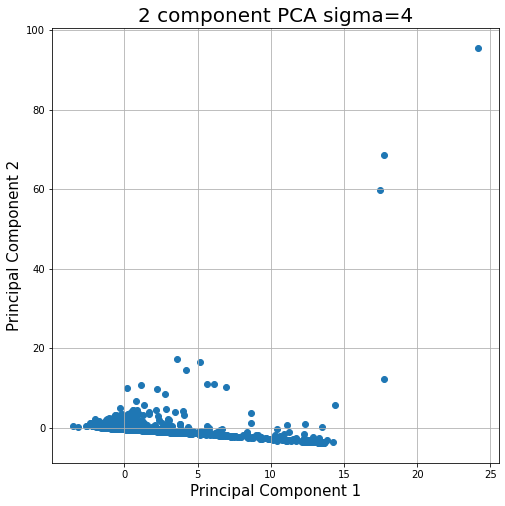

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA'+title, fontsize = 20)
ax.scatter(pc_s1.loc[:, 'PC1'],
           pc_s1.loc[:, 'PC2'])
ax.grid()